## Predict survival using Titanic Dataset
### Preprocessing
### EDA 
### Model Training 
### Model Testing

In [2]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os

In [3]:
'''\
    Load training and testing datasets'''

train_data = pd.read_csv("..\\Data\\Input\\train.csv")
test_data = pd.read_csv("..\\Data\\Input\\test.csv")
data = pd.concat([train_data, test_data], axis= 0, ignore_index= True)

## Preprocessing
### Removing Duplicates
### Imputation
### Feature Engineering
### Encoding



In [34]:
'''\
    No duplicates found within dataset'''

data.duplicated().sum()

np.int64(0)

In [6]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     712 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1.0
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0.0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0.0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1.0
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,NaN
887,92,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,NaN
888,884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,NaN
889,474,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C,NaN


In [8]:
'''\
    - Check for unique values for categorical data. 
    - No anomalies found'''
data.Sex.nunique()

2

In [4]:
"""
- Fill missing values in the 'Age' column with the median age
- Fill missing values in the 'Embarked' column with the mode of the 'Embarked' column
"""
data = data.fillna({'Age': data.Age.median(), 'Embarked': data.Embarked.mode()})
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,28.0,0,0,1601,56.4958,NaN,S,1.0
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0000,NaN,S,0.0
2,528,1,"Farthing, Mr. John",male,28.0,0,0,PC 17483,221.7792,C95,S,0.0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1.0
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,NaN
887,92,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,NaN
888,884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,NaN
889,474,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C,NaN


## Feature Engineering

In [5]:
"""
- Create a new column 'IsChild' by applying a lambda function to the 'Age' column
  - The lambda function assigns 1 if 'Age' is less than 18, otherwise 0
- Apply the same transformation to the test data
"""

data['IsChild'] = data['Age'].apply(lambda x: 1 if x < 18 else 0)
test_data['IsChild'] = data['IsChild']

In [7]:
'''\
- Create a new column 'FamilySize' by summing 'SibSp' and 'Parch' columns and adding 1
- Apply the same transformation to the test data
'''
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
test_data['FamilySize'] = data['FamilySize']

In [8]:
"""
- Extract titles from the 'Name' column and create a new column 'Title'
- Apply the same transformation to the test data
- Display a cross-tabulation of 'Title' and 'Sex' columns
"""

data['Title']  = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = data['Title']
pd.crosstab(data["Title"], data['Sex'])

<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
C:\Users\EbenezerQuayson\AppData\Local\Temp\ipykernel_24776\3837517727.py:7: SyntaxWarning: invalid escape sequence '\.'
  data['Title']  = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [9]:
"""\
- Extract the first character from the 'Cabin' column to create the 'Deck' column
- Map the deck letters to numerical values
- Fill any missing values in the 'Deck' column with 0
- Convert the 'Deck' column to integer type
- Apply the same transformation to the test data
"""

data['Deck'] = data['Cabin'].str.slice(0,1) 
data['Deck'] = data['Deck'].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6,"G":7, "T":8})
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(np.int64)

test_data['Deck'] = data['Deck']

In [10]:
"""
- Replace specific titles with 'Rare' in the 'Title' column
- Replace 'Mlle' with 'Miss' in the 'Title' column
- Replace 'Ms' with 'Miss' in the 'Title' column
- Replace 'Mme' with 'Mrs' in the 'Title' column
- Map the titles to numerical values
- Fill any missing values in the 'Title' column with 0
- Apply the same transformation to the test data
"""

data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')

data['Title'] = data['Title'].replace('Ms', 'Miss')

data['Title'] = data['Title'].replace('Mme', 'Mrs')

data['Title'] = data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
data['Title'] = data['Title'].fillna(0)
test_data['Title'] = data['Title']

In [11]:
'''\
  Encoding categorical data'''

cols = data.select_dtypes(include = 'object').columns
for col in cols:
  encode = LabelEncoder()
  data[col] = encode.fit_transform(data[col])

data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,IsChild,FamilySize,Title,Deck
0,693,3,452,1,28.0,0,0,80,56.4958,147,2,1.0,0,1,1,0
1,482,2,268,1,28.0,0,0,136,0.0000,147,2,0.0,0,1,1,0
2,528,1,245,1,28.0,0,0,583,221.7792,88,2,0.0,0,1,1,3
3,856,3,8,0,18.0,0,1,484,9.3500,147,2,1.0,0,2,3,0
4,802,2,174,0,31.0,1,1,556,26.2500,147,2,1.0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,881,2,739,0,25.0,0,1,115,26.0000,147,2,NaN,0,2,3,0
887,92,3,31,1,20.0,0,0,341,7.8542,147,2,NaN,0,1,1,0
888,884,2,61,1,28.0,0,0,565,10.5000,147,2,NaN,0,1,1,0
889,474,2,401,0,23.0,0,0,628,13.7917,90,0,NaN,0,1,3,4


In [12]:
from sklearn.preprocessing import StandardScaler

# Scale Age, Fare, Sex so columns to prevent them from dominating other columns
scaler = StandardScaler()
data[['Fare', 'Age', 'Sex']] = scaler.fit_transform(data[['Fare', 'Age', 'Sex']])

In [44]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,IsChild,FamilySize,Title,Deck
0,693,3,452,0.737695,-0.104637,0,0,80,0.489104,147,2,1.0,0,1,1,0
1,482,2,268,0.737695,-0.104637,0,0,136,-0.648422,147,2,0.0,0,1,1,0
2,528,1,245,0.737695,-0.104637,0,0,583,3.817033,88,2,0.0,0,1,1,3
3,856,3,8,-1.355574,-0.873136,0,1,484,-0.460162,147,2,1.0,0,2,3,0
4,802,2,174,-1.355574,0.125912,1,1,556,-0.119886,147,2,1.0,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,881,2,739,-1.355574,-0.335187,0,1,115,-0.124920,147,2,NaN,0,2,3,0
887,92,3,31,0.737695,-0.719436,0,0,341,-0.490280,147,2,NaN,0,1,1,0
888,884,2,61,0.737695,-0.104637,0,0,565,-0.437007,147,2,NaN,0,1,1,0
889,474,2,401,-1.355574,-0.488887,0,0,628,-0.370730,90,0,NaN,0,1,3,4


In [31]:
'''\
    separate the data back to train data and test_data after processing
    Output: train_data, test_data'''

train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

In [32]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,IsChild,FamilySize,Title,Deck
712,566,3,204,0.737695,-0.412037,2,0,519,-0.162169,147,2,NaN,0,3,1,0
713,161,3,186,0.737695,1.124960,0,1,470,-0.324253,147,2,NaN,0,2,1,0
714,554,3,463,0.737695,-0.565736,0,0,171,-0.502949,147,0,NaN,0,1,1,0
715,861,3,325,0.737695,0.894411,2,0,399,-0.364355,147,2,NaN,0,3,1,0
716,242,3,567,-1.355574,-0.104637,1,0,444,-0.336334,147,1,NaN,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,881,2,739,-1.355574,-0.335187,0,1,115,-0.124920,147,2,NaN,0,2,3,0
887,92,3,31,0.737695,-0.719436,0,0,341,-0.490280,147,2,NaN,0,1,1,0
888,884,2,61,0.737695,-0.104637,0,0,565,-0.437007,147,2,NaN,0,1,1,0
889,474,2,401,-1.355574,-0.488887,0,0,628,-0.370730,90,0,NaN,0,1,3,4


## EDA
### Univariate Analysis
### Bivariate Analysis
### Multivariate Analysis

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Name'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Embarked'}>,
        <Axes: title={'center': 'Survived'}>],
       [<Axes: title={'center': 'IsChild'}>,
        <Axes: title={'center': 'FamilySize'}>,
        <Axes: title={'center': 'Title'}>,
        <Axes: title={'center': 'Deck'}>]], dtype=object)

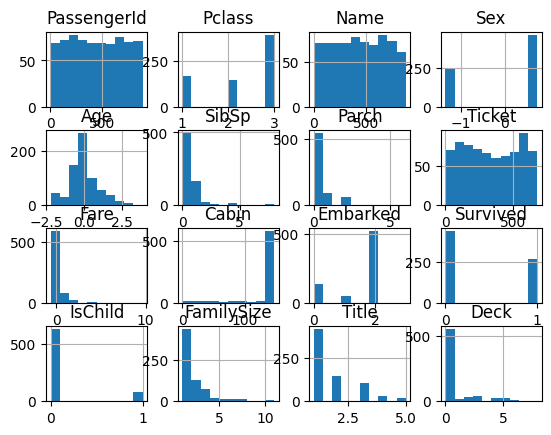

In [46]:
'''\
    Histogram to visualize the distribution of quantitative data'''
train_data.hist()


In [64]:
'''\
    Describe categorical data'''
data.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,IsChild,FamilySize,Title,Deck
count,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,712.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,445.000000,-1.116453e-16,2.581798e-16,0.523008,0.381594,338.528620,-7.974666e-18,130.744108,1.538721,0.383427,0.126824,1.904602,1.728395,0.776655
std,257.353842,0.836071,257.353842,1.000562e+00,1.000562e+00,1.102743,0.806057,200.850657,1.000562e+00,36.024237,0.794231,0.486563,0.332962,1.613459,1.030039,1.590899
min,1.000000,1.000000,0.000000,-1.355574e+00,-2.224156e+00,0.000000,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,223.500000,2.000000,222.500000,-1.355574e+00,-5.657365e-01,0.000000,0.000000,158.500000,-4.891482e-01,147.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,446.000000,3.000000,445.000000,7.376951e-01,-1.046374e-01,0.000000,0.000000,337.000000,-3.573909e-01,147.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,668.500000,3.000000,667.500000,7.376951e-01,4.333115e-01,1.000000,0.000000,519.500000,-2.424635e-02,147.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000
max,891.000000,3.000000,890.000000,7.376951e-01,3.891554e+00,8.000000,6.000000,680.000000,9.667167e+00,147.000000,3.000000,1.000000,1.000000,11.000000,5.000000,8.000000


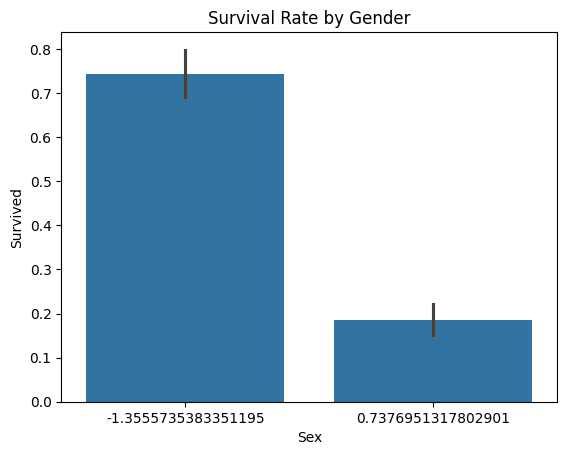

In [48]:
'''\
    Bar plot for survival rate by gender
    significantly more females survived than males'''

sns.barplot(x="Sex", y="Survived", data=data)
plt.title("Survival Rate by Gender")
plt.show()

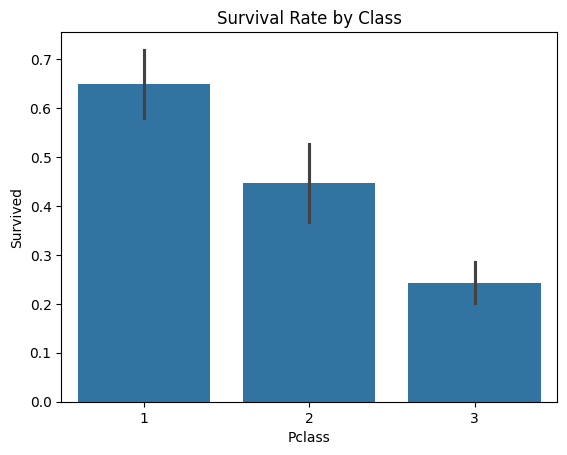

In [49]:
'''\
    Plot survival by class of passenger
    It is evident that the survival rate is higher for passengers in class 1 and lowest for class 3'''

sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Survival Rate by Class")
plt.show()


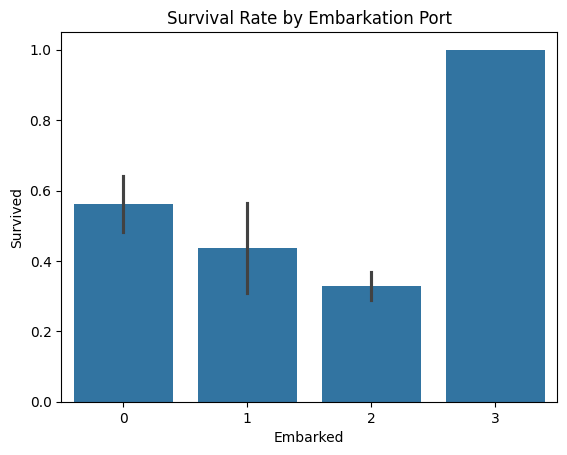

In [50]:
'''\
    Plot survival by embarkation port'''

sns.barplot(x="Embarked", y="Survived", data=data)
plt.title("Survival Rate by Embarkation Port")
plt.show()


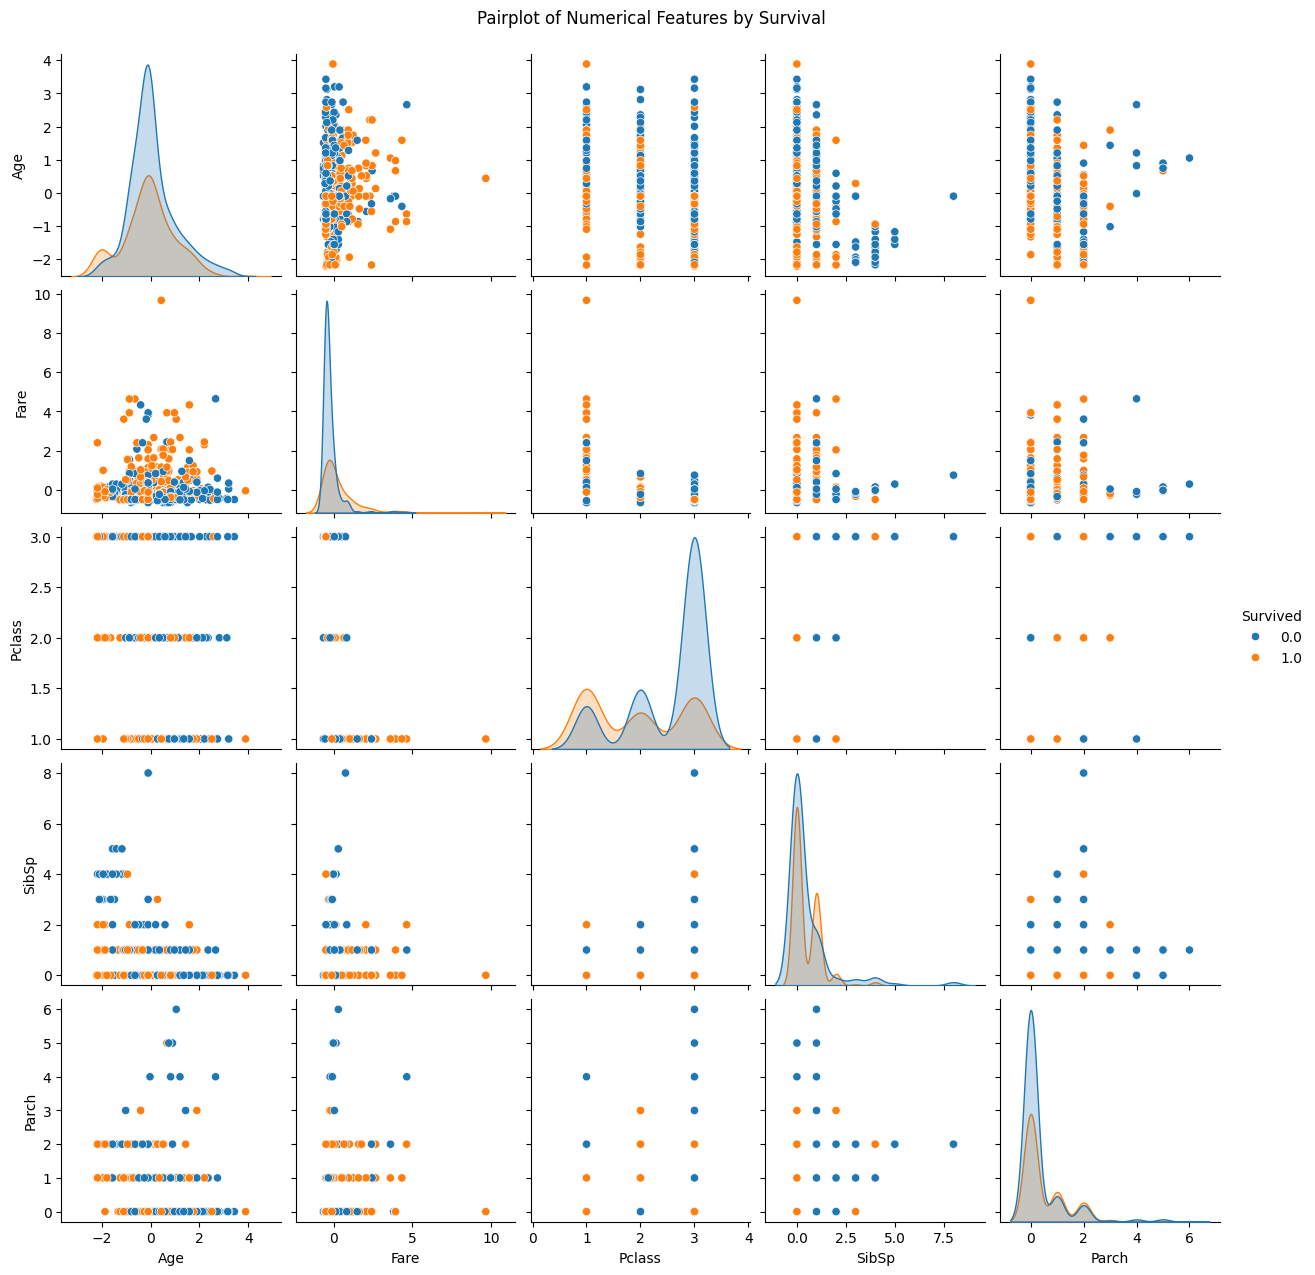

In [51]:
'''\
    Plot how quantitative datapoints are distributed and how they relate with the target feature'''

sns.pairplot(data, hue="Survived", vars=["Age", "Fare", "Pclass", "SibSp", "Parch"])
plt.suptitle("Pairplot of Numerical Features by Survival", y=1.02)
plt.show()


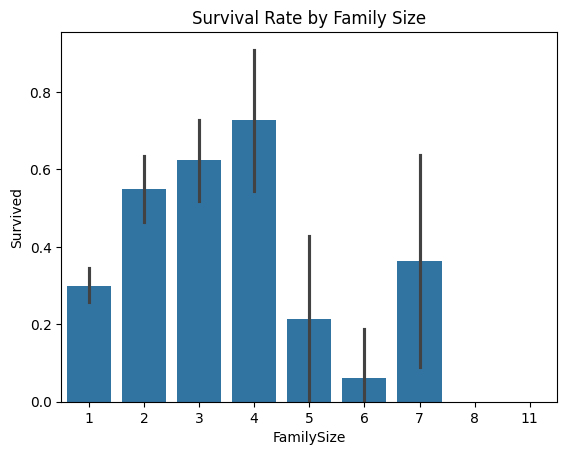

In [52]:
'''\
    Plot survival by FamilySize'''

sns.barplot(x="FamilySize", y="Survived", data=data)
plt.title("Survival Rate by Family Size")
plt.show()


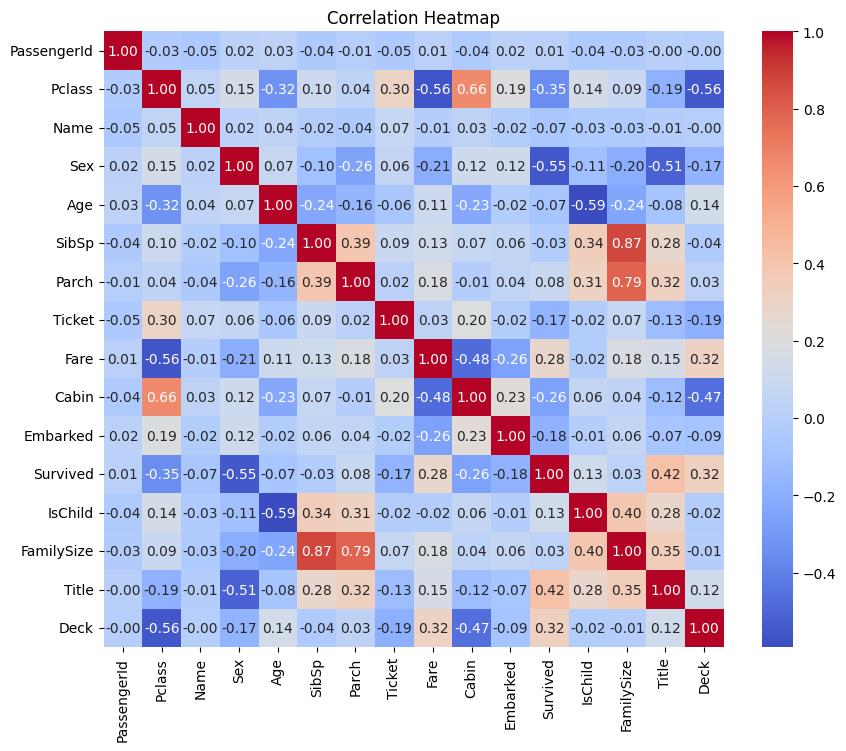

In [53]:
'''\
    Correlation between features
    Display correlation heatmap
    Correlation points to the features that are strong predictors of the target'''

correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



# Model Training

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, roc_auc_score
import joblib
import os

In [15]:
from sklearn.model_selection import train_test_split


'''\
    Split the data into training (70%) and validation (30%) sets'''

X = train_data.drop(columns=['PassengerId','Survived','Cabin', 'Ticket'])  # Features
y = train_data['Survived']  # Target variable


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
'''\
    Define Parameter for Logistic Regression'''

lr_param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.1, 1, 10, 100],  
    'solver': ['liblinear'],  
    'max_iter': [100, 200, 500]  
}

# Initialize logistic regression model
lr_model = LogisticRegression()

# Perform grid search with cross-validation
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

# Best parameters and score for logistic regression
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Cross-Validation Score for Logistic Regression:", lr_grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score for Logistic Regression: 0.8215151515151515


In [57]:
'''\
      Predict on the validation set using logistic regression'''

best_lr_model = lr_grid_search.best_estimator_
y_pred = best_lr_model.predict(X_valid)

#y_pred = rf_model.predict(X_valid)

# Evaluation Metrics
print('''LR MODEL METRICS: 
      
      ''')
print(classification_report(y_valid, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_pred):.4f}")


LR MODEL METRICS: 
      
      
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       134
         1.0       0.75      0.68      0.71        80

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214

ROC-AUC Score: 0.7703


In [58]:

'''\
    Saving the rf model. So it can be used in the future'''

# Specify the folder where the model should be saved
folder_path = r'../Models' 
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # Create the folder if it doesn't exist


# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Format the filename with ROC-AUC score and folder
filename = os.path.join(folder_path, f'lr_model_roc_auc_.pkl')

# Save the model
joblib.dump(best_lr_model, filename)
print(f"Model saved successfully as {filename}!")

Model saved successfully as ../Models\lr_model_roc_auc_.pkl!


In [17]:
'''\
    Define the parameter grid for Random Forest'''

param_grid = {
    'n_estimators': [50, 100, 200, 300],     # Number of trees
    'max_depth': [None, 10, 20],    # Maximum depth of the trees
    'min_samples_split': [2, 3],    # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 3, 4],      # Minimum samples in a leaf node
    'bootstrap': [False],          # Whether to use bootstrap samples
    'class_weight': ['balanced', None]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8435151515151516


In [18]:
'''\
      Predict for validation set'''

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_valid)

#y_pred = rf_model.predict(X_valid)

# Evaluation Metrics
print('''RANDOM FOREST MODEL METRICS: 
      
      ''')
print(classification_report(y_valid, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_pred):.4f}")

RANDOM FOREST MODEL METRICS: 
      
      
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       134
         1.0       0.80      0.70      0.75        80

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214

ROC-AUC Score: 0.7978


In [61]:
'''\
    Saving the rf model. So it can be used in the future'''

# Specify the folder where the model should be saved
folder_path = r'../Models' 
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # Create the folder if it doesn't exist


# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Format the filename with ROC-AUC score and folder
filename = os.path.join(folder_path, f'rf_model_roc_auc_.pkl')

# Save the model
joblib.dump(best_rf_model, filename)
print(f"Model saved successfully as {filename}!")

Model saved successfully as ../Models\rf_model_roc_auc_.pkl!


In [ ]:
'''\
    Define parameter grid for SVM'''
svm_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Initialize SVM model
svm_model = SVC()

# Perform grid search with cross-validation
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best parameters and score for SVM
print("Best Parameters for SVM:", svm_grid_search.best_params_)
print("Best Cross-Validation Score for SVM:", svm_grid_search.best_score_)


In [ ]:
#Predictions for validation set
best_svm_model = svm_grid_search.best_estimator_
y_pred = svm_model.predict(X_valid)

# Evaluation Metrics
print(classification_report(y_valid, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_valid, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       134
           1       0.64      0.34      0.44        80

    accuracy                           0.68       214
   macro avg       0.67      0.61      0.61       214
weighted avg       0.67      0.68      0.65       214

ROC-AUC Score: 0.6128


In [ ]:
'''\
    Saving the rf model. So it can be used in the future'''

# Specify the folder where the model should be saved
folder_path = r'../Models' 
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # Create the folder if it doesn't exist


# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)


filename = os.path.join(folder_path, f'svm_model_roc_auc_.pkl')

# Save the model
joblib.dump(svm_model, filename)
print(f"Model saved successfully as {filename}!")

In [108]:
'''Save Test dataset to a new csv file'''
test_data.to_csv('../Data/Input/test_data_preprocessed.csv', index=False )

In [33]:
'''\
    Load the test data'''

#test_data = pd.read_csv('../Data/Input/test_data_preprocessed.csv')
test_data_select = test_data.drop(columns=['PassengerId','Survived','Cabin', 'Ticket']).copy()
test_data_select

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,IsChild,FamilySize,Title,Deck
712,3,204,0.737695,-0.412037,2,0,-0.162169,2,0,3,1,0
713,3,186,0.737695,1.124960,0,1,-0.324253,2,0,2,1,0
714,3,463,0.737695,-0.565736,0,0,-0.502949,0,0,1,1,0
715,3,325,0.737695,0.894411,2,0,-0.364355,2,0,3,1,0
716,3,567,-1.355574,-0.104637,1,0,-0.336334,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,739,-1.355574,-0.335187,0,1,-0.124920,2,0,2,3,0
887,3,31,0.737695,-0.719436,0,0,-0.490280,2,0,1,1,0
888,2,61,0.737695,-0.104637,0,0,-0.437007,2,0,1,1,0
889,2,401,-1.355574,-0.488887,0,0,-0.370730,0,0,1,3,4


In [34]:
'''\
    Load saved random forest model and predict on test data
    We get the model from the Models folder
    
    '''
loaded_model = joblib.load('../Models/rf_model_roc_auc_.pkl')


In [45]:
'''\
    predict on test data
    
    '''
predictions = loaded_model.predict(test_data_select)



predictions

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [36]:
'''\
    predict probabilities of the classes survival and death ie 1 and 0 respectively
    
    '''
probabilities = loaded_model.predict_proba(test_data_select)

In [68]:
'''\
    Convert probabilities to a dataframe'''
predictions_df = pd.DataFrame(predictions, columns=['Survived'])
predictions_df['Passenger'] = test_data['PassengerId'].values
predictions_df = predictions_df[['Passenger', 'Survived']]


In [69]:
predictions_df

,Passenger,Survived
0,566,0.0
1,161,0.0
2,554,0.0
3,861,0.0
4,242,1.0
...,...,...
174,881,1.0
175,92,0.0
176,884,0.0
177,474,1.0


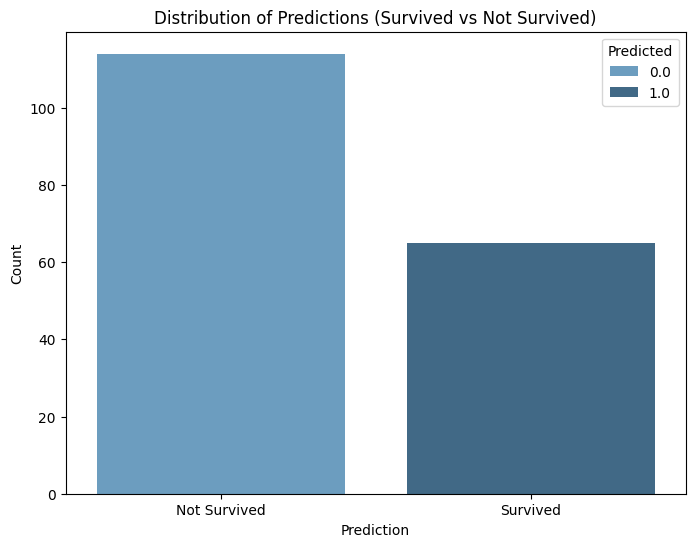

In [41]:
'''\
    Count plot for the predictions of the model survived against not survived'''

plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted', data=metrics_df, palette="Blues_d", hue='Predicted')
plt.title('Distribution of Predictions (Survived vs Not Survived)')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


In [71]:
'''\
    Creat a dataframe with the PassengerId and the predicted values. 
    Dataframe is converted to a csv file and saved in the Data Folder'''

output_df = predictions_df
output_df.to_csv('../Data/Output/Ebenezer_submission.csv', index=False)